<h4 align="center">Jian Sun</h4>
<h4 align="center">DUID: 873397832</h4>

# CONTENT
- Introduction
- Data Exploration
- Model
- Conclusion
- Appendix

(Text(0.5, 1.0, 'Ted + Hillary'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

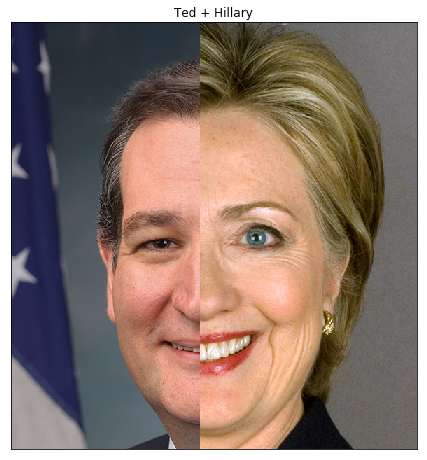

In [7]:
## import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

## read images and generate new image matrix
ted = cv2.imread('./project3/ted_cruz.jpg')
hil = cv2.imread('./project3/hillary_clinton.jpg')
row,column,layer = np.shape(ted)
combo = np.zeros((np.shape(ted)))

## transfer pixel values
combo[:,0:270,:]=ted[:,0:270,:]
combo[0:610,270:580,:]=hil[40:650,290:600,:]

## pixel transformation
def BGR2RGB(Input):
    output = np.zeros(np.shape(Input));
    output[:,:,0] = Input[:,:,2] 
    output[:,:,1] = Input[:,:,1] 
    output[:,:,2] = Input[:,:,0]
    output = output.astype('uint8')
    return output

## show image
plt.figure(figsize=(16,9))
plt.subplot(121),plt.imshow(BGR2RGB(combo[0:610,0:580,:]))
plt.title('Ted + Hillary'), plt.xticks([]), plt.yticks([])

# Introduction

Computer Vision, a magic world, has many powerful applications. One of them is face morphing, which combines two images together. Therefore, the final generated image looks similar to both two or more originial iamges. The objective of this project is to develop a face morphing algorithm that takes two facial images with facial landmark points and create a mixed image that looks like both based on the value of parameter alpha. For instance, if alpha is set to .5 the morphed face looks 50% like image 1 and 50% like image 2. If alpha is set to 1, the results will look like image 2 and if it is set to 0, it looks like image 1. In this report, alpha is set to different values, the different results will be compared.

# Data Exploration
The selected dataset here is consisting of 2 color images and 3 text file.  
One image is Ted Cruz, the other one is Hillary Clinton. One text file is facial feature points of ted, one is that of hillary, the other one is the points of Delaunay Triangulation.

The size of each file is:

|Name               |Row    |Column |Layer  
|:------------------|:-----:|:-----:|:-----:
|ted_cruz.jpg       |800    |600    |3      
|hillary_clinton.jpg|800    |600    |3    
|ted_p.txt          |76     |2      |1        
|hil_p.txt          |76     |2      |1      
|tri.txt            |142    |3      |1     

# Model
## Target
This project is launched around morph. One of the key part of morph is geometric transformation. The selected geometric transformation here is affine transformation. So this is a process to get familiar with affine transformation. Finally, we coover two images together.

## Find Point Correspondences using Facial Feature Detection
This is the first step. Here, it is of great importance to find exactly corresponding points on both images. The total points number should be the same, the points' positions should be corresponded, such as eye to eye, ear to ear.  
The given text files include those points, which is very convenient. Therefore, the points are directly imported into Matlab by function textread().  

## Delaunay Triangulation
This is the second step. This step is very important as well. Delaunay Triangulation is drawn by linking the points mentioned at last step on both images. These divided pieces will be affined to a new blank image one by one.  
Thanks to Canvas, we downloaded a text file with 142 delaunay triangles instend of generating it. We need to notice here that each number in this file means the row number of each feature poins file. And using textread( ) again imports file.

## Warping images and alpha blending 

This is the third step.

### Find location of feature points in morphed image
We need to calculate the location $(x_{m}, y_{m})$ of the pixel in the morphed image by fusing the points from ted's and hillary's. The equation is  
$x_{m}=(1-\alpha)x_{i}+\alpha x_{i}$  
$y_{m}=(1-\alpha)y_{i}+\alpha y_{i}$  
In the code, we define a function, linkk(), to finish the job. We generate a new zero matrix, called points, with the size of $76 \times 2$, then applying above equations, finally outputing matrix points.

### Calculate affine transforms and Warp triangles
We try to find an affine transformation to map pixel value from original image to morphed image, and we plan to transform those delaunay triangles one by one instead of directly transforming the whole image.  
In the code, we define a function, BoundingBox( ), to make sure the bounding box of delaunay triangle. Then according to the left top corner position, width and height of bounding box, we select corresponded image area. Next, we affine this area to morphed image with self defined function, AffineTform( ). Within this function, cp2tform( ) is selected to determine the transit matrix, imtransform is selected to calculate the affined pixel value and do the interpolation for morphed image. Here, bilinear and nearest neighbor methods are orderly selected to do interpolation. And their results will be compared.

### Alpha blend warped images
We warp two images together for different alpha values. The equation is $M(x_{m},y_{m})=(1-\alpha)I(x_{i},y_{i}) + \alpha J(x_{j},y_{j})$. 
In the code, we do not only use the above function, but also define a three layers mask. The size of each layer is the same as bounding box. Within that mask, we define the points within delaunay triangle as 1 and the rest points as 0. Finally, we copy triangular region of the rectangular patch to the output image and plot the image out.

## Code Structure
The whole code include 4 matlab files. One is a class called face_morph_r, which has 4 functions, linkk( ), BoundingBox( ), AffineTform( ) and start_morph( ), 2 main body file, one for 7 alpha value, the other one for generating 101 images to make preparison for video, the last file is to record video.

# Conclusion
Alpha is set to 7 values, 0, 0.1, 0.3, 0.5, 0.7, 0.9 and 1. Based on this array, we output 7 results in different interpolation methods, which are shown below.

## Corresponding Points 

(Text(0.5, 1.0, 'Feature Points'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

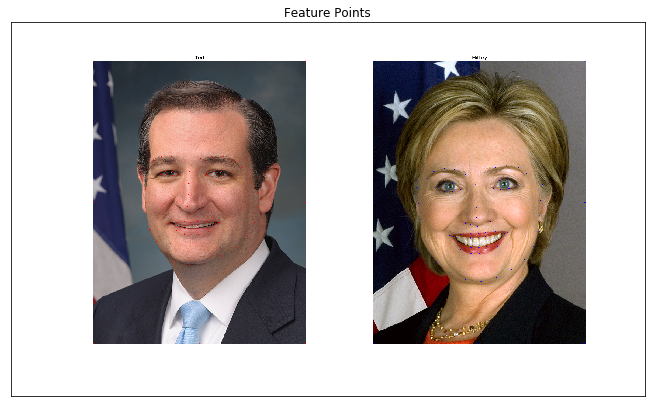

In [4]:
fea_p = cv2.imread('./Results/feature_point.png')

## show image
plt.figure(figsize=(25,16))
plt.subplot(121),plt.imshow(BGR2RGB(fea_p))
plt.title('Feature Points'), plt.xticks([]), plt.yticks([])

## Delaunay Triangles

(Text(0.5, 1.0, 'Delaunay Triangles'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

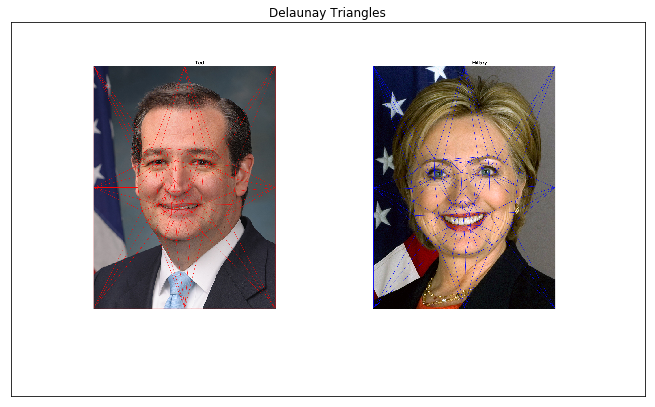

In [5]:
de_tri = cv2.imread('./Results/delaunay_triangle.png')

## show image
plt.figure(figsize=(25,16))
plt.subplot(121),plt.imshow(BGR2RGB(de_tri))
plt.title('Delaunay Triangles'), plt.xticks([]), plt.yticks([])

## Bilinear Interpolation and Nearest Neighbor Interpolation

(Text(0.5, 1.0, 'Nearest Neighbor one'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

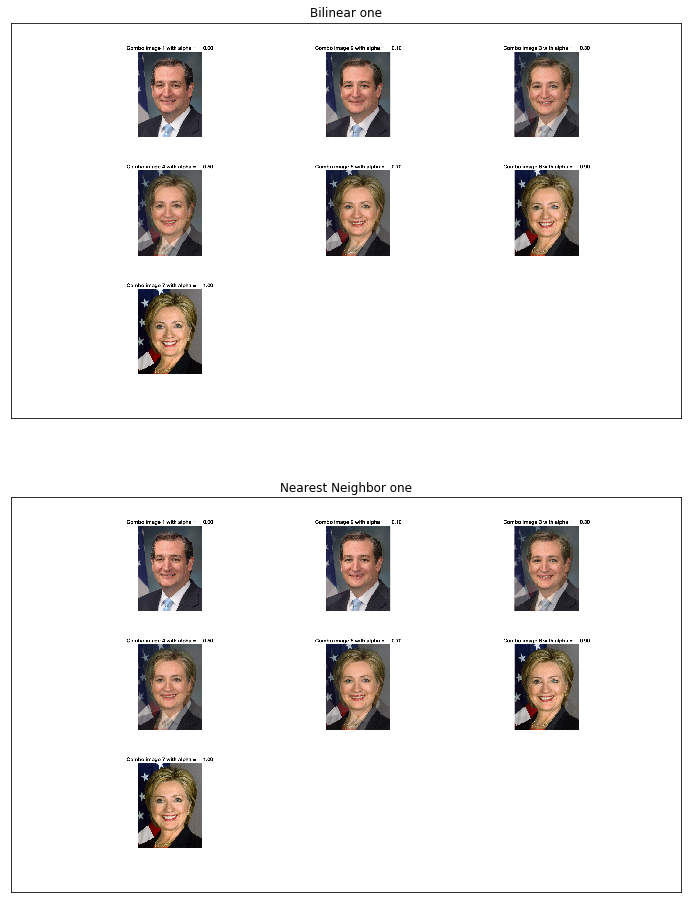

In [10]:
bil_r = cv2.imread('./Results/combo_r_bilinear.png')
nea_r = cv2.imread('./Results/combo_r_nearest_neighbor.png')

## show image
plt.figure(figsize=(25,16))
plt.subplot(211),plt.imshow(BGR2RGB(bil_r))
plt.title('Bilinear one'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(BGR2RGB(nea_r))
plt.title('Nearest Neighbor one'), plt.xticks([]), plt.yticks([])

As we can see, there is not big difference between two methods. Therefore, for these two images, we can choose either method.  
What's more, to better show the gradual change process, we randomly choose nearest neighbor method and generate 101 images ($\alpha$ from 0 to 1, the distance is 0.01) to reord to video, which is shown below.

## Video
Please [click here](https://www.youtube.com/watch?v=lAUeGCIBudM) to play the video. As we can see, two faces are morphed smoothly.

In general, face morphing is a fantastic, very interesting technique, it has boradly application fields.

# Appendix
## Self-defined Class -- face_morph_r.m

In [ ]:
classdef face_morph_r

    properties
        value
    end
    
    methods (Static)
        function points = linkk(alpha, file1, file2)
            points = round(file1.*(1 - alpha) + file2.*alpha);
        end
    end
    methods (Static)
        % by referring cv2.boundingRect(), we notice that there are 4
        % outputs, minimum x, minimum y, triangle's width and triangle's
        % height. Hence, we code the function and also output this 4 value. 
        function [Tri_BB, Tri_PP] = BoundingBox(tri_p, face_p)
            % make sure scope
            get_six_p = [face_p(tri_p(1),:);face_p(tri_p(2),:);
                         face_p(tri_p(3),:);];
            
            % most up
            x_up = min(get_six_p(:,1));
            
            % most down
            x_down = max(get_six_p(:,1));
            
            % most left
            y_left = min(get_six_p(:,2));

            % most right
            y_right = max(get_six_p(:,2));
            
            % get width and height
            height = x_down-x_up+1;
            width = y_right-y_left+1;
            
            Tri_BB = [x_up y_left width height x_down y_right];
            Tri_PP = get_six_p;
        end
        
        function tform_value = AffineTform(ori_image,tri_ori,tri_f,f_r,method)
            tform = cp2tform(tri_ori,tri_f,'affine');
            if method == 1
                tform_value = imtransform(ori_image, tform,'bilinear','XData',
                    [f_r(1), f_r(5)],'YData',[f_r(2), f_r(6)],'XYScale', [1,1]);
            elseif method == 2
                tform_value = imtransform(ori_image, tform,'nearest','XData',
                    [f_r(1), f_r(5)],'YData',[f_r(2), f_r(6)],'XYScale', [1,1]);
            else
                disp('Only choose between 1 and 2 ^_^')
            end
        end
        
        function fimage = start_morph(alpha,tri,ted_p,hillary_p,fimg_p,t_1,h_1,
                                      fimage,method)
            % Find bounding rectangle for each triangle
            transit = tri;
       
            [t_r,tri_t] = face_morph_r.BoundingBox(transit,ted_p);
            [h_r,tri_h] = face_morph_r.BoundingBox(transit,hillary_p);
            [f_r,tri_f] = face_morph_r.BoundingBox(transit,fimg_p);
    
            % Offset points by left top corner of the respective rectangles
            t_Rect = [tri_t(1,1)-t_r(1),tri_t(1,2)-t_r(2);tri_t(2,1)-t_r(1),
                      tri_t(2,2)-t_r(2);tri_t(3,1)-t_r(1),tri_t(3,2)-t_r(2);];
            h_Rect = [tri_h(1,1)-h_r(1),tri_h(1,2)-h_r(2);tri_h(2,1)-h_r(1),
                      tri_h(2,2)-h_r(2);tri_h(3,1)-h_r(1),tri_h(3,2)-h_r(2);];
            f_Rect = [tri_f(1,1)-f_r(1),tri_f(1,2)-f_r(2);tri_f(2,1)-f_r(1),
                      tri_f(2,2)-f_r(2);tri_f(3,1)-f_r(1),tri_f(3,2)-f_r(2);];
            
            % Apply warpImage to small rectangular patches
            ted_Rect = t_1(t_r(2):t_r(2)+t_r(3),t_r(1):t_r(1)+t_r(4),:);
            hil_Rect = h_1(h_r(2):h_r(2)+h_r(3),h_r(1):h_r(1)+h_r(4),:);
            
            t_warp = face_morph_r.AffineTform(t_1, tri_t, tri_f, f_r, method);
            h_warp = face_morph_r.AffineTform(h_1, tri_h, tri_f, f_r, method);
                       
            % Alpha blend rectangular patches
            fim_Rect = (1.0 - alpha) * t_warp + (alpha * h_warp);
            
            % define mask for RGB each layer
            mask_temp = repmat(poly2mask(f_Rect(:,1),f_Rect(:,2),
                                         f_r(3),f_r(4)),1,1,3);
            mask = repmat(poly2mask(f_Rect(:,1),f_Rect(:,2),f_r(3),f_r(4)),1,1,3);
            
            for k = 1:3
                for x = 1:f_r(3)
                    if mask_temp(x,1,k)==0
                        pd=true;
                    else
                        pd=false;
                    end
                    for y = 1:f_r(4)
                        if pd 
                            if (y+2<=f_r(4)) && (mask_temp(x,y+1,k)==0) && 
                            (mask_temp(x,y+2,k)==1)
                                mask(x,y,k) = 1;
                                mask(x,y+1,k) = 1;
                                pd=false;
                            elseif (y+1<=f_r(4)) && (mask_temp(x,y+1,k)==1)
                                mask(x,y,k) = 1;
                                pd=false;
                            end
                        else
                            if (y+2<=f_r(4)) && (mask_temp(x,y+1,k)==0) &&
                            (mask_temp(x,y+2,k)==0)
                                mask(x,y+1,k) = 1;
                                mask(x,y+2,k) = 1;
                                break;
                            elseif (y+1<=f_r(4)) && (mask_temp(x,y+1,k)==0)
                                mask(x,y+1,k) = 1;
                                break;
                            end
                        end
                    end
                end
                for y = 1:f_r(4)
                    if mask_temp(1,y,k)==0
                        pd=true;
                    else
                        pd=false;
                    end
                    for x = 1:f_r(3)
                        if pd
                            if (x+2<=f_r(3)) && (mask_temp(x+1,y,k)==0) &&
                            (mask_temp(x+2,y,k)==1)
                                mask(x,y,k) = 1;
                                mask(x+1,y,k) = 1;
                                pd=false;
                            elseif (x+1<=f_r(3)) && (mask_temp(x+1,y,k)==1)
                                mask(x,y,k) = 1;
                                pd=false;
                            end
                        else
                            if (x+2<=f_r(3)) && (mask_temp(x+1,y,k)==0) &&
                            (mask_temp(x+2,y,k)==0)
                                mask(x+1,y,k) = 1;
                                mask(x+2,y,k) = 1;
                                break;
                            elseif (x+1<=f_r(3)) && (mask_temp(x+1,y,k)==0)
                                mask(x+1,y,k) = 1;
                                break;
                            end
                        end
                    end
                end
            end
            % Copy triangular region of the rectangular patch to the output image
            for q=1:3
                fimage(f_r(2):f_r(6),f_r(1):f_r(5),q) = fimage(f_r(2):f_r(6),f_r(1):
                                     f_r(5),q) .* (1 - mask(:,:,q)) + 
                                     (fim_Rect(:,:,q) .* mask(:,:,q)); 
            end
        end
    end
end

## Compare the Effect of Two Interpolation Methods -- main1.m

In [ ]:
% import images and points files
% the three text files are imported by clicking "Import Data" button.
ted_p = textread('./project3/ted_p.txt')+1;
hillary_p = textread('./project3/hil_p.txt')+1;
tri = textread('./project3/tri.txt')+1;
ted = imread('./project3/ted_cruz.jpg');
hillary = imread('./project3/hillary_clinton.jpg');
fimage = im2double(zeros(size(ted)));

% add points on both images
figure(1);
subplot(2,2,1);imshow(ted);title('Ted')
hold on;
plot(ted_p(:,1),ted_p(:,2), 'r.', 'MarkerSize', 5);
subplot(2,2,2);imshow(hillary);title('Hillary')
hold on;
plot(hillary_p(:,1),hillary_p(:,2), 'b.', 'MarkerSize', 5);
subplot(2,2,3)
hold on;
imshow(ted);triplot(tri, ted_p(:,1)', ted_p(:,2)','r');
title('Ted')
subplot(2,2,4)
hold on;
imshow(hillary);triplot(tri, hillary_p(:,1)', hillary_p(:,2)','b');
title('Hillary')

% convert uint8 image to float64
h_1 = im2double(hillary);
t_1 = im2double(ted);

% Find location of feature points in morphed image
% generate final null image matrix
fm=face_morph_r;

% define the scope of alpha
alpha = [0 0.1 0.3 0.5 0.7 0.9 1];

for m = 1:size(alpha,2)
    fm.value=alpha(m);
    fimg_p = round(fm.linkk(fm.value, ted_p, hillary_p));

    % there are two interpolation methods, 1 for bilinear, 2 for nearest
    % neighbor, please choose one to try
    method = 1;
    % final warp
    % plot every combo out
    figure(4);
    for i = 1:size(tri,1)
        fimage = fm.start_morph(alpha(m),tri(i,:),ted_p,hillary_p,fimg_p,
                                t_1,h_1,fimage,method);
        bt = sprintf('Combo image %d with alpha = %8.2f',round(m),alpha(m));
        subplot(3,3,m);imshow(im2uint8(fimage));title(bt)     
    end
    
    method = 2;
    % final warp
    % plot every combo out
    figure(5);
    for i = 1:size(tri,1)
        fimage = fm.start_morph(alpha(m),tri(i,:),ted_p,hillary_p,fimg_p,
                                t_1,h_1,fimage,method);
        bt = sprintf('Combo image %d with alpha = %8.2f',round(m),alpha(m));
        subplot(3,3,m);imshow(im2uint8(fimage));title(bt)
        
    end    
end

## Prepare 101 Images for Recording Video -- main2.m

In [ ]:
% import images and points files
% the three text files are imported by clicking "Import Data" button.
ted_p = textread('./project3/ted_p.txt')+1;
hillary_p = textread('./project3/hil_p.txt')+1;
tri = textread('./project3/tri.txt')+1;
ted = imread('./project3/ted_cruz.jpg');
hillary = imread('./project3/hillary_clinton.jpg');
fimage = zeros(int64(size(ted)));

% convert uint8 image to float64
h_1 = im2double(hillary);
t_1 = im2double(ted);

% Find location of feature points in morphed image
% generate final null image matrix
fm_r=face_morph_r;

% preparing 101 images to record video
% aplha from 0 to 1, the distance is 0.01
% define the scope of alpha then divide 100
image_num = sort(randperm(101)-1);

% there are two interpolation methods, 1 for bilinear, 2 for nearest
% neighbor, please choose one to try
method = 2;

% save image here
workingDir='ttoh_r';
mkdir(workingDir,'ttoh_r')

for m = 1:size(image_num,2)
    fm_r.value=image_num(m)/100;
    fimg_p = round(fm_r.linkk(fm_r.value, ted_p, hillary_p));

    % final warp
    % plot every combo out
    figure(6);
    for i = 1:size(tri,1)
        fimage = fm_r.start_morph(image_num(m)/100,tri(i,:),ted_p,hillary_p,
                                  fimg_p,t_1,h_1,fimage,method);
    end
    bt = sprintf('Combo image %d with alpha = %8.2f',round(m),image_num(m)/100);
    imshow(im2uint8(fimage));title(bt);
    xbt = sprintf('./ttoh_r/%d.jpeg',m);
    saveas(gcf,xbt)
end

## Record Video From Saved Images -- dovideo.m

In [ ]:
% record video from file ttoh_r
video = VideoWriter('ted_to_hillary_r.avi'); %create the video object
video.FrameRate = 10;
open(video); %open the file for writing
for i=1:101 %where N is the number of images
  xbt = sprintf('./ttoh_r/%d.jpeg',i);
  I = imread(xbt); %read the next image
  writeVideo(video,I); %write the image to file
end
close(video);       